In [72]:
import pandas as pd

In [1]:
import requests
from bs4 import BeautifulSoup


In [25]:
url_he = 'https://www.trustpilot.com/review/www.homeexchange.com'

# Test Scrapping 

In [23]:
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

In [77]:
items=soup.find_all('div',class_="styles_reviewCardInner__EwDq2")

In [78]:
rating = int(items[0].find('section', 
                           class_="styles_reviewContentwrapper__zH_9M").find('div',
                                                                            class_="styles_reviewHeader__iU9Px").attrs['data-service-review-rating'])

In [79]:
country = items[0].find('div',class_="typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_detailsIcon__Fo_ua").find('span').text


In [80]:
date = pd.to_datetime(items[0].find('time').attrs['datetime'], format='%Y-%m-%dT%H:%M:%S.000Z')

# Find last page

In [140]:
lastpage = False
i = 1
while lastpage == False : 
    url = url_he+"?page={}".format(i)
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    try:
        soup.find_all('nav',role="navigation")[0].find_all('a')[-1].attrs['aria-disabled']            
        lastpage = True
        lastpagenumber = i
    except KeyError:
        lastpage = False
        i = i+1

In [139]:
lastpagenumber

123

# Loop

In [103]:
#loop through each review page
date = []
rating = []
country = []
for j in range(1, lastpagenumber+1):
    
    url = url_he+"?page={}".format(j)
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    items=soup.find_all('div',class_="styles_reviewCardInner__EwDq2")

    for i in range(len(items)) : 
        date.append(pd.to_datetime(items[i].find('time').attrs['datetime'][:-len('.188Z')], format='%Y-%m-%dT%H:%M:%S'))
        rating.append(int(items[i].find('section', 
                                    class_="styles_reviewContentwrapper__zH_9M").find('div',
                                                                                      class_="styles_reviewHeader__iU9Px").attrs['data-service-review-rating']))
        country.append(items[i].find('div',
                                     class_="typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_detailsIcon__Fo_ua").find('span').text)
        
    

In [141]:
rating_info = {
        "date": date,
        "rating": rating, 
        "country": country
    }

df = pd.DataFrame(rating_info)
df

,date,rating,country
0,2023-05-12 16:52:56,5,IE
1,2023-05-13 14:23:08,3,US
2,2023-05-11 12:37:08,5,US
3,2023-05-10 10:35:24,5,GB
4,2023-05-20 16:50:04,5,FR
...,...,...,...
2449,2015-03-22 08:51:32,5,AT
2450,2015-03-16 03:31:36,5,US
2451,2014-11-24 17:57:51,5,US
2452,2014-03-04 20:09:06,3,DK


In [143]:
import matplotlib.pyplot as plt

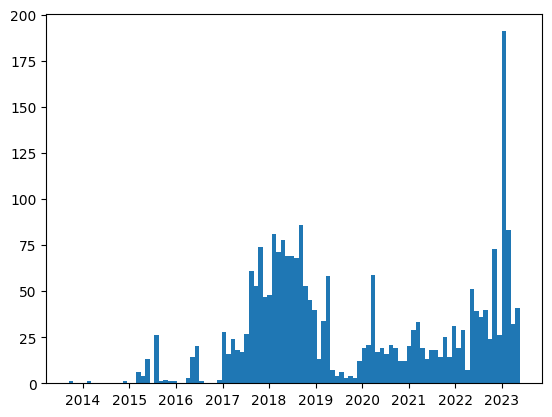

In [162]:
plt.hist(df.date, bins = (100))
plt.show()

In [159]:
df.to_csv('data/trustpilot_rating_scrapping.csv')

In [160]:
%ls data

exchanges.h5*      subscription.h5*
subscription.csv*  trustpilot_rating_scrapping.csv*
